In [1]:
# Importing all necessary libraries

from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
# Uploading Dataset

from google.colab import files

#new = files.upload()

# Reading the Dataset

child_care_compliance = pd.read_csv("DOHMH_Childcare_Center_Inspections_20250209.csv")

In [3]:
# Checking the Head of the Dataset

child_care_compliance.head()

,Center Name,Legal Name,Building,Street,Borough,ZipCode,Phone,Permit Number,Permit Expiration,Status,...,Public Health Hazard Violation Rate,Average Public Health Hazard Violation Rate,Critical Violation Rate,Average Critical Violation Rate,Inspection Date,Regulation Summary,Violation Category,Health Code Sub Section,Violation Status,Inspection Summary Result
0,"JACKSON CHILDREN'S SERVICES, INC.","JACKSON CHILDREN'S SERVICES, INC.",88-23,31 AVENUE,QUEENS,11369.0,718-205-1919,105769.0,08/10/2024,Permitted,...,0.0,6.1285,50.0,18.9541,12/07/2022,At time of inspection floors/walls ceilings we...,GENERAL,47.41(j),OPEN,Initial Annual Inspection - Reinspection Not R...
1,"JACKSON CHILDREN'S SERVICES, INC.","JACKSON CHILDREN'S SERVICES, INC.",88-23,31 AVENUE,QUEENS,11369.0,718-205-1919,105769.0,08/10/2024,Permitted,...,0.0,6.1285,50.0,18.9541,12/07/2022,At time of inspection floors/walls ceilings we...,GENERAL,47.41(j),OPEN,Initial Annual Inspection - Reinspection Not R...
2,ATERET TORAH CENTER,BET YAAKOV ATERET TORAH,2166,CONEY ISLAND AVENUE,BROOKLYN,11223.0,718-375-7100,NaN,01/23/2115,Active,...,0.0,23.3017,50.0,35.2291,10/20/2022,School-based child care staff observed caring ...,GENERAL,43.11(b),OPEN,Initial Annual Inspection - Reinspection Required
3,PACKER SUMMER 2022,PACKER COLLEGIATE INSTITUTE,170,Joralemon Street,BROOKLYN,11201.0,718-250-0259,33693.0,09/15/2022,Expired-In Renewal,...,0.0,14.2558,0.0,21.8553,06/22/2022,There were no new violations observed at the t...,NaN,NaN,NaN,Initial Annual Inspection - Passed inspection ...
4,THE LEARNING EXPERIENCE,"RIVERDALE CHILDCARE EXPERIENCE, LLC",3210,Riverdale Avenue,BRONX,10463.0,718-708-5884,97738.0,09/28/2023,Permitted,...,NaN,NaN,NaN,NaN,11/05/2021,At time of inspection child care service unabl...,GENERAL,47.25(a)(1),CORRECTED,NaN


In [4]:
# Checking the size of the Dataset

child_care_compliance.shape

(27828, 34)

In [5]:
child_care_compliance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828 entries, 0 to 27827
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Center Name                                  27828 non-null  object 
 1   Legal Name                                   27828 non-null  object 
 2   Building                                     27816 non-null  object 
 3   Street                                       27828 non-null  object 
 4   Borough                                      27828 non-null  object 
 5   ZipCode                                      27787 non-null  float64
 6   Phone                                        27825 non-null  object 
 7   Permit Number                                24086 non-null  float64
 8   Permit Expiration                            27828 non-null  object 
 9   Status                                       27828 non-null  object 
 10

In [6]:
# Calculating the threshold for 40% missing values

missing_threshold = child_care_compliance.shape[0] * 0.40

# Identifying 1columns with ≥ 40% missing values

cols_to_drop = [col for col in child_care_compliance.columns if child_care_compliance[col].isna().sum() >= missing_threshold]

# Indicating the columns that needs  to be dropped

print("Columns with ≥ 40% missing values:", cols_to_drop)

Columns with ≥ 40% missing values: ['URL', 'Violation Category', 'Health Code Sub Section', 'Violation Status']


In [7]:
# Checking Missing Values

missing_values = child_care_compliance.isnull().sum()
missing_percent = (missing_values / len(child_care_compliance)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

# Display missing value summary
print(missing_summary)

                                             Missing Count  Missing %
URL                                                  13057  46.920368
Violation Category                                   11625  41.774472
Health Code Sub Section                              11624  41.770878
Violation Status                                     11624  41.770878
Actual                                                3964  14.244646
Date Permitted                                        3964  14.244646
Permit Number                                         3742  13.446888
Inspection Summary Result                             3391  12.185568
Average Violation Rate Percent                        1583   5.688515
Average Critical Violation Rate                       1583   5.688515
Average Public Health Hazard Violation Rate           1583   5.688515
Violation Rate Percent                                1578   5.670548
Public Health Hazard Violation Rate                   1578   5.670548
Critical Violation R

In [8]:
# Convert date columns to datetime
date_columns = ['Inspection Date', 'Permit Expiration', 'Date Permitted', 'Actual']
for col in date_columns:
    if col in child_care_compliance.columns:
        child_care_compliance[col] = pd.to_datetime(child_care_compliance[col], errors='coerce')

# Drop column with 100% missing values
if 'Actual' in child_care_compliance.columns and child_care_compliance['Actual'].isnull().all():
    child_care_compliance = child_care_compliance.drop(columns=['Actual'])

# Drop rows with missing critical information and create a copy to avoid SettingWithCopyWarning
critical_cols = ['Inspection Date', 'Violation Category', 'Violation Status']
child_care_compliance = child_care_compliance.dropna(subset=critical_cols).copy()

# Fill numeric columns with median using .loc
numeric_cols = child_care_compliance.select_dtypes(include=['float64', 'int64']).columns
child_care_compliance.loc[:, numeric_cols] = child_care_compliance[numeric_cols].fillna(child_care_compliance[numeric_cols].median())

# Fill categorical columns with mode using .loc
categorical_cols = child_care_compliance.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_value = child_care_compliance[col].mode()[0]
    child_care_compliance.loc[:, col] = child_care_compliance[col].fillna(mode_value)

# Final check
print("Remaining missing values:", child_care_compliance.isnull().sum().sum())

Remaining missing values: 3287


<ipython-input-8-53a1b68484c8>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  child_care_compliance[col] = pd.to_datetime(child_care_compliance[col], errors='coerce')


In [9]:
# Checking Missing Values

missing_values = child_care_compliance.isnull().sum()
missing_percent = (missing_values / len(child_care_compliance)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

# Display missing value summary
print(missing_summary)

                Missing Count  Missing %
Date Permitted           3287  20.286367


In [11]:
child_care_compliance.describe(include="object")

,Center Name,Legal Name,Building,Street,Borough,Phone,Status,Age Range,Day Care ID,Program Type,Facility Type,Child Care Type,URL,Regulation Summary,Violation Category,Health Code Sub Section,Violation Status,Inspection Summary Result,Season
count,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203,16203
unique,1791,1744,1372,1349,5,1788,3,5,2160,5,3,4,789,476,3,477,2,20,4
top,BEANSTALK CHILD CARE ACADEMY,"NYC EARLY LEARNING COMPANY, INC",2380,EAST TREMONT AVENUE,QUEENS,347-730-5438,Permitted,2 YEARS - 5 YEARS,DC10478,PRESCHOOL,GDC,Child Care - Pre School,www.archny.org/education,At time of inspection floors/walls ceilings we...,GENERAL,47.41(j),CORRECTED,Initial Annual Inspection - Reinspection Requi...,Fall
freq,149,251,113,203,4961,95,10275,10761,80,13600,12106,10313,8447,1419,8351,1419,14626,8817,5225


In [12]:
child_care_compliance.describe()

,ZipCode,Permit Number,Permit Expiration,Maximum Capacity,Building Identification Number,Date Permitted,Violation Rate Percent,Average Violation Rate Percent,Total Educational Workers,Average Total Educational Workers,Public Health Hazard Violation Rate,Average Public Health Hazard Violation Rate,Critical Violation Rate,Average Critical Violation Rate,Inspection Date,Inspection Month,Age of Center (Years),Is Large Center,Total Violation Rate,Violation Severity Ratio
count,16203.000000,16203.000000,16203,16203.000000,1.620300e+04,12916,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203.000000,16203,16203.000000,12916.000000,16203.000000,16203.000000,16203.000000
mean,10837.491823,47805.426773,2031-08-16 05:52:28.083688448,73.398630,2.875305e+06,2011-09-13 00:49:50.151749632,46.686909,26.357189,12.839104,10.226374,17.035448,9.865514,40.758392,21.990165,2022-04-17 04:28:13.019811072,6.564772,10.571098,0.254953,57.793839,0.666860
min,10001.000000,375.000000,1900-01-01 00:00:00,0.000000,0.000000e+00,1959-09-01 00:00:00,0.000000,17.439100,0.000000,0.000000,0.000000,4.998400,0.000000,15.383500,2020-07-07 00:00:00,1.000000,-0.800000,0.000000,0.000000,0.000000
25%,10455.000000,7400.000000,2023-06-06 00:00:00,24.000000,2.017732e+06,2005-01-05 18:00:00,25.000000,21.905000,6.000000,8.009400,0.000000,6.128500,20.000000,18.954100,2021-10-20 00:00:00,3.000000,4.100000,0.000000,25.000000,0.500000
50%,11201.000000,33952.000000,2024-02-04 00:00:00,55.000000,3.052305e+06,2013-02-07 00:00:00,50.000000,21.905000,10.000000,11.976900,0.000000,6.128500,40.000000,18.954100,2022-05-03 00:00:00,7.000000,9.100000,0.000000,50.000000,0.750000
75%,11358.000000,103890.000000,2024-10-31 00:00:00,102.000000,4.088248e+06,2018-06-20 00:00:00,66.666700,26.886800,16.000000,11.976900,25.000000,14.255800,57.142900,21.855300,2022-12-01 00:00:00,10.000000,17.100000,1.000000,83.333300,1.000000
max,11694.000000,105897.000000,2117-09-17 00:00:00,1300.000000,5.170168e+06,2023-01-23 00:00:00,100.000000,45.181700,144.000000,11.976900,100.000000,23.301700,100.000000,35.229100,2023-04-24 00:00:00,12.000000,63.500000,1.000000,200.000000,1.000000
std,522.558867,41313.842903,NaN,90.302509,1.213001e+06,NaN,30.860592,9.626147,13.012304,2.754934,26.713930,6.987116,30.288639,6.775931,NaN,3.780181,7.710774,0.435848,46.008873,0.373465


In [13]:
# Save the cleaned dataset
child_care_compliance.to_csv("cleaned_child_care_compliance.csv", index=False)

# Download the cleaned dataset in Google Colab
from google.colab import files
files.download("cleaned_child_care_compliance.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **EDA**

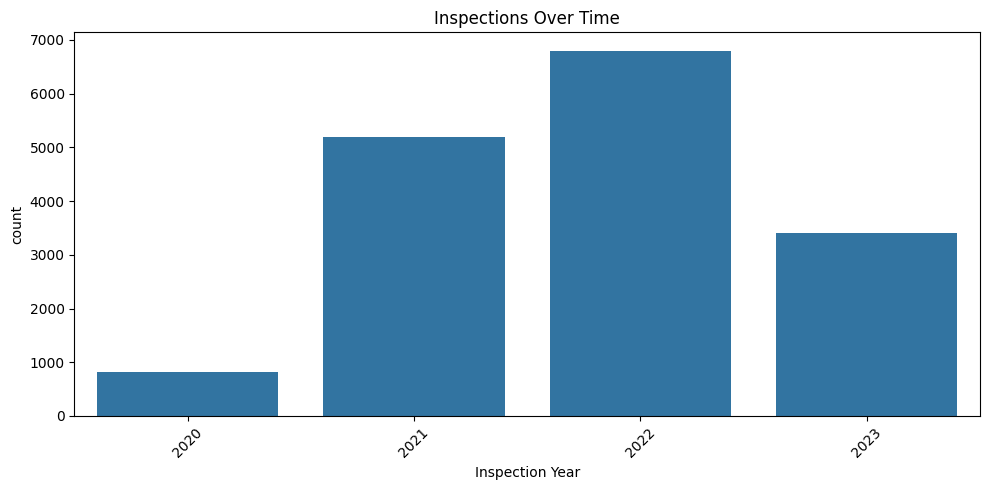

In [14]:
# 1. Inspections Over Time
child_care_compliance['Inspection Year'] = child_care_compliance['Inspection Date'].dt.year

plt.figure(figsize=(10, 5))
sns.countplot(data=child_care_compliance, x='Inspection Year', order=sorted(child_care_compliance['Inspection Year'].unique()))
plt.title('Inspections Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

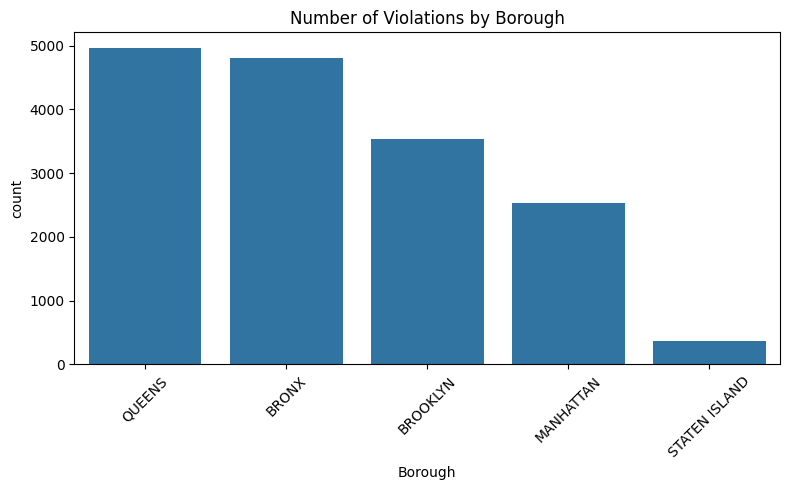

In [15]:
#2. Violations by Borough
plt.figure(figsize=(8, 5))
sns.countplot(data=child_care_compliance, x='Borough', order=child_care_compliance['Borough'].value_counts().index)
plt.title('Number of Violations by Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

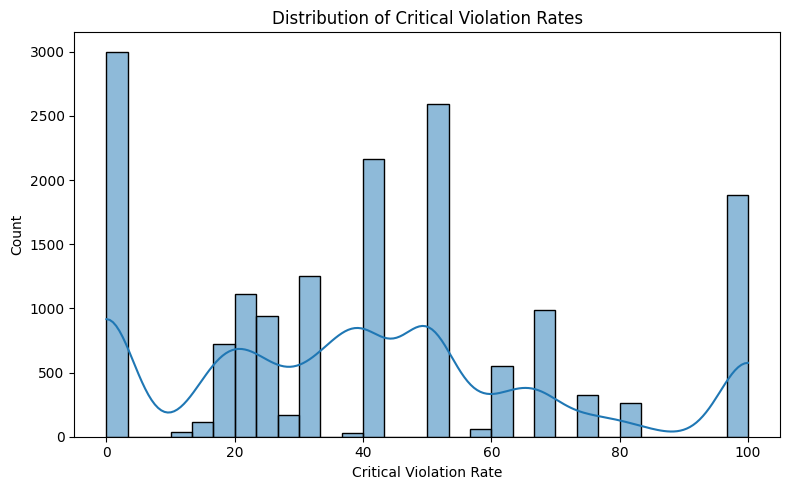

In [16]:
#3. Critical Violation Rate
plt.figure(figsize=(8, 5))
sns.histplot(data=child_care_compliance, x='Critical Violation Rate', bins=30, kde=True)
plt.title('Distribution of Critical Violation Rates')
plt.tight_layout()
plt.show()

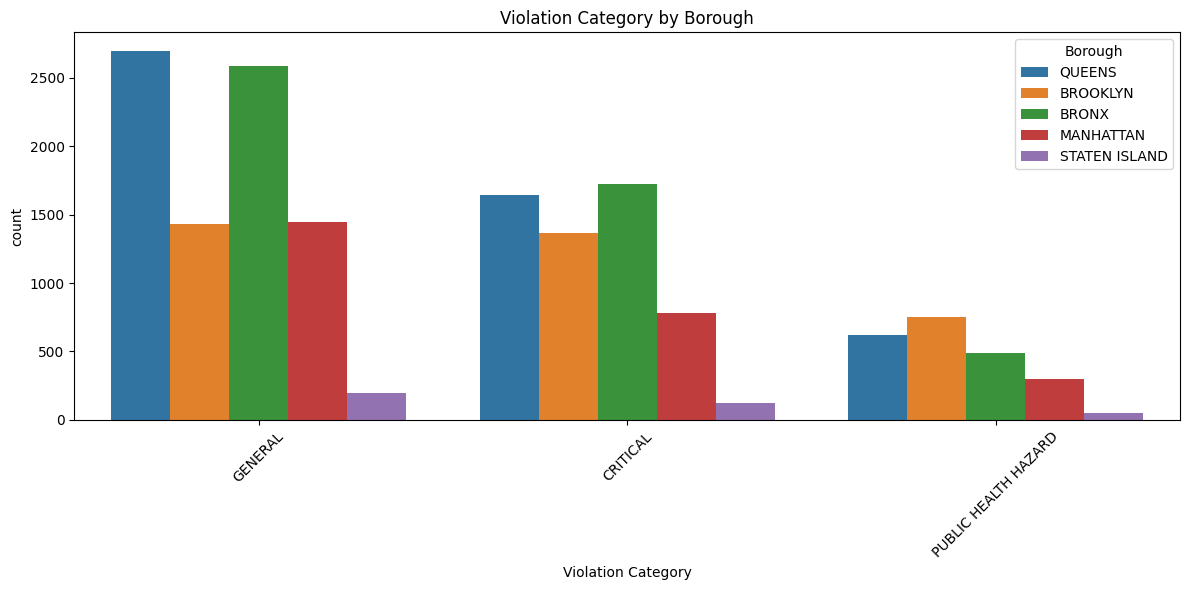

In [17]:
#5. Violation Category by Borough
plt.figure(figsize=(12, 6))
sns.countplot(data=child_care_compliance, x='Violation Category', hue='Borough')
plt.title('Violation Category by Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **1.	What is the distribution of violation rates across different boroughs?**

In [18]:
# Set visual style
sns.set(style="whitegrid")


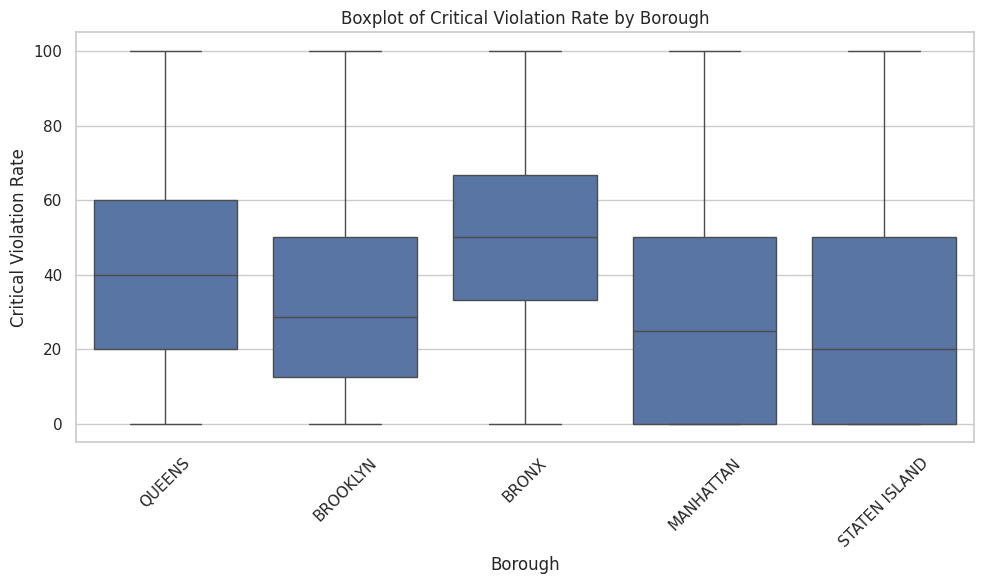

In [19]:
# 1. Boxplot of Critical Violation Rate by Borough
plt.figure(figsize=(10, 6))
sns.boxplot(data=child_care_compliance, x='Borough', y='Critical Violation Rate')
plt.title('Boxplot of Critical Violation Rate by Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

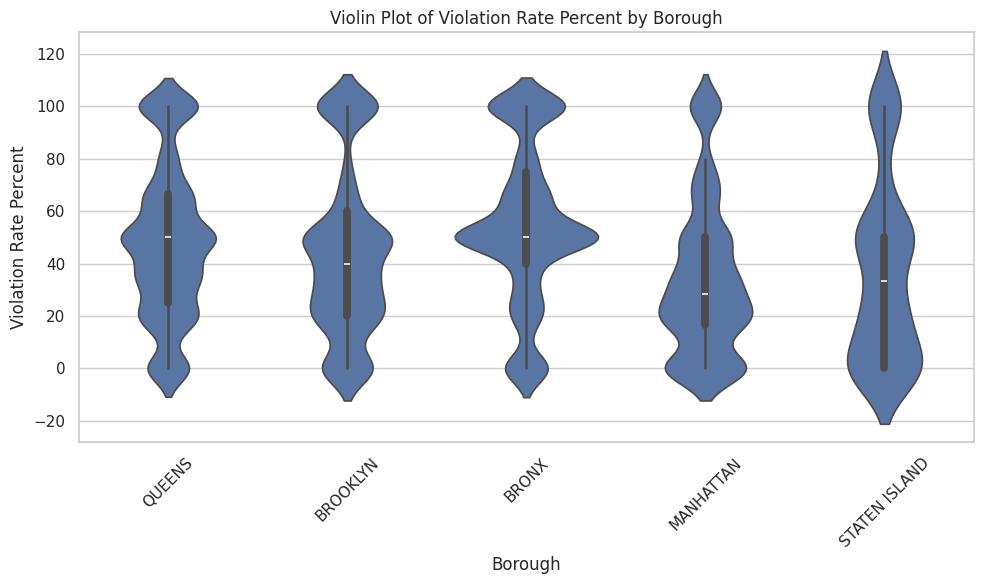

In [20]:
# 2. Violin Plot of Violation Rate Percent by Borough
plt.figure(figsize=(10, 6))
sns.violinplot(data=child_care_compliance, x='Borough', y='Violation Rate Percent')
plt.title('Violin Plot of Violation Rate Percent by Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

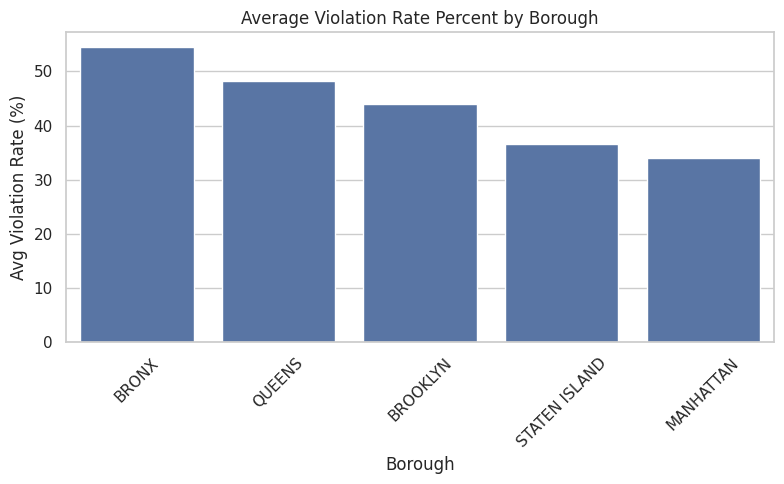

In [21]:
# 3. Bar Chart of Average Violation Rate Percent by Borough
avg_violation = child_care_compliance.groupby('Borough')['Violation Rate Percent'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_violation.index, y=avg_violation.values)
plt.title('Average Violation Rate Percent by Borough')
plt.ylabel('Avg Violation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **2.	How do violation rates differ between various program types (e.g., Preschool vs. Infant Toddler programs)?**

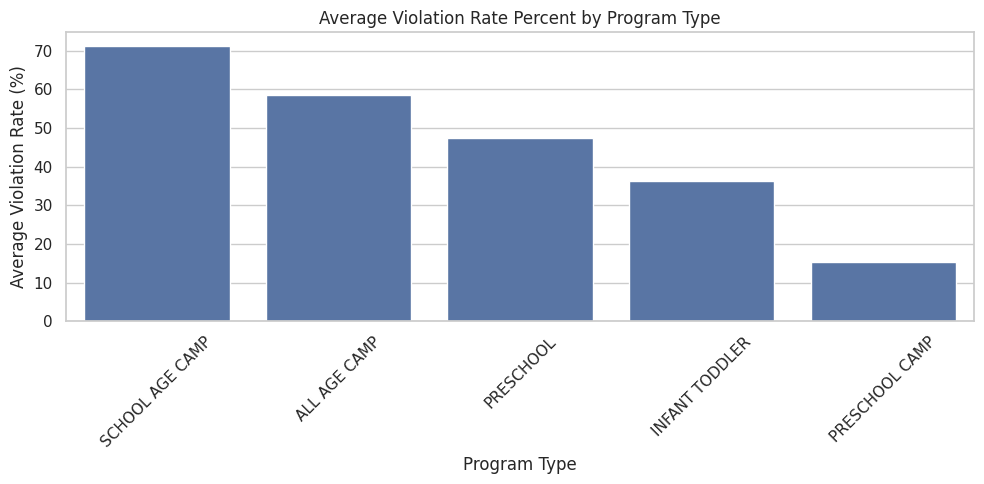

In [22]:
sns.set(style="whitegrid")

# 1. Bar Chart: Average Violation Rate Percent by Program Type (no palette warning)
avg_violation_df = child_care_compliance.groupby('Program Type', as_index=False)['Violation Rate Percent'].mean()
avg_violation_df = avg_violation_df.sort_values(by='Violation Rate Percent', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=avg_violation_df, x='Program Type', y='Violation Rate Percent')
plt.title('Average Violation Rate Percent by Program Type')
plt.ylabel('Average Violation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-23-74cba661981f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


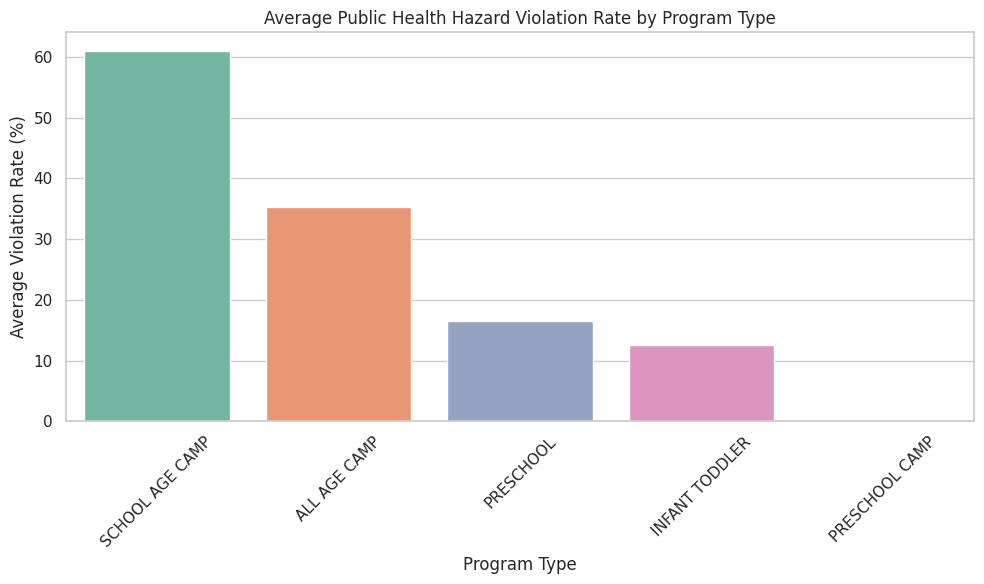

In [23]:
# Create a DataFrame for average violation rates
avg_public_health_df = child_care_compliance.groupby('Program Type', as_index=False)[
    'Public Health Hazard Violation Rate'
].mean().sort_values(by='Public Health Hazard Violation Rate', ascending=False)

# Plot the bar chart correctly
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_public_health_df,
    x='Program Type',
    y='Public Health Hazard Violation Rate',
    palette='Set2'
)

# Customize the plot
plt.title('Average Public Health Hazard Violation Rate by Program Type')
plt.xlabel('Program Type')
plt.ylabel('Average Violation Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
## 2. Boxplot: Violation Rate Percent by Program Type
#plt.figure(figsize=(12, 6))
#sns.boxplot(data=child_care_compliance, x='Program Type', y='Violation Rate Percent')
#plt.title('Violation Rate Percent Distribution by Program Type')
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

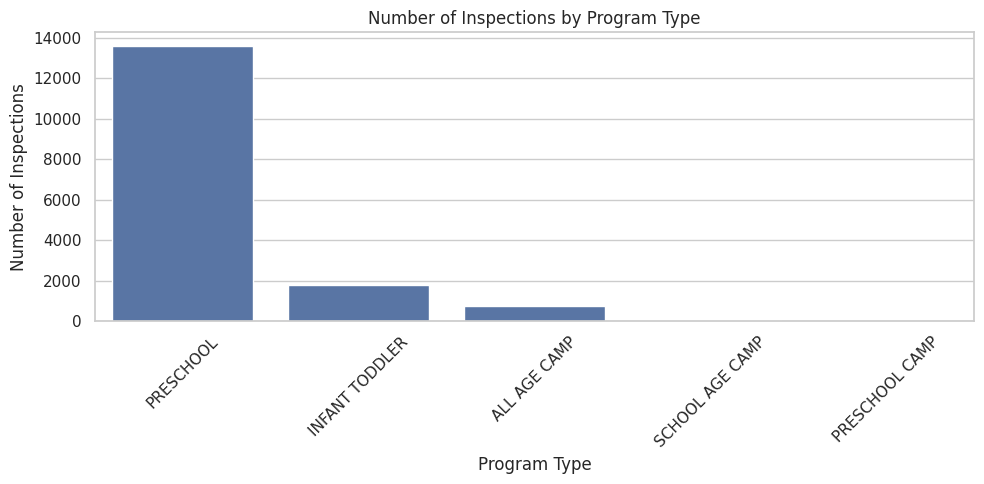

In [25]:
# 3. Count Plot: Number of Inspections by Program Type
plt.figure(figsize=(10, 5))
sns.countplot(data=child_care_compliance, x='Program Type', order=child_care_compliance['Program Type'].value_counts().index)
plt.title('Number of Inspections by Program Type')
plt.ylabel('Number of Inspections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **# 4.	What is the trend of critical and public health hazard violations over the three-year period?**

In [26]:
# Convert Inspection Date to datetime and extract year
child_care_compliance['Inspection Date'] = pd.to_datetime(child_care_compliance['Inspection Date'], errors='coerce')
child_care_compliance['Inspection Year'] = child_care_compliance['Inspection Date'].dt.year

# Group by year and calculate average violation rates
trend_df = child_care_compliance.groupby('Inspection Year')[[
    'Critical Violation Rate', 'Public Health Hazard Violation Rate'
]].mean().reset_index()


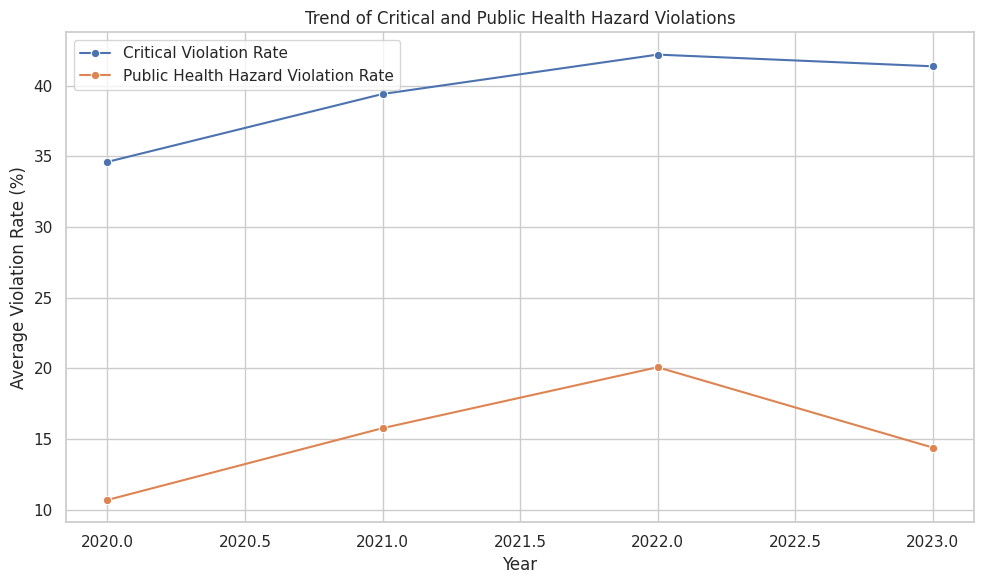

In [27]:
#Line Chart - Trend over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='Inspection Year', y='Critical Violation Rate', marker='o', label='Critical Violation Rate')
sns.lineplot(data=trend_df, x='Inspection Year', y='Public Health Hazard Violation Rate', marker='o', label='Public Health Hazard Violation Rate')
plt.title('Trend of Critical and Public Health Hazard Violations')
plt.xlabel('Year')
plt.ylabel('Average Violation Rate (%)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **# Performing Train-Test Split**

In [28]:
# Define the features and target variable
features = ['Maximum Capacity', 'Borough', 'Program Type', 'Facility Type']
target = 'Violation Rate Percent'

# Prepare input features (X) and target (y)
X = child_care_compliance[features]
y = child_care_compliance[target]

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Print the sizes of the splits
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training feature shape: (12962, 4)
Testing feature shape: (3241, 4)
Training target shape: (12962,)
Testing target shape: (3241,)


# **# 3.	How does the childcare center's maximum capacity influence its average number of violations per inspection?**

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = child_care_compliance[['Maximum Capacity']]
y = child_care_compliance['Violation Rate Percent']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
results_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'R² Score', 'Slope (Coefficient)', 'Intercept'],
    'Value': [
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred),
        model.coef_[0],
        model.intercept_
    ]
})

# Print table with lines
print(results_df.to_markdown(index=False))

| Metric                   |        Value |
|:-------------------------|-------------:|
| Mean Squared Error (MSE) | 944.303      |
| R² Score                 |   0.00663578 |
| Slope (Coefficient)      |  -0.0163549  |
| Intercept                |  47.9674     |


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
features = ['Maximum Capacity', 'Borough', 'Program Type', 'Facility Type']
target = 'Violation Rate Percent'

X = child_care_compliance[features]
y = child_care_compliance[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Preprocessing: encode categorical features
categorical_features = ['Borough', 'Program Type', 'Facility Type']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline (Preprocessing + Random Forest)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate
results_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'R² Score'],
    'Value': [
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred)
    ]
})

# Print table with lines
print(results_df.to_markdown(index=False))

| Metric                   |      Value |
|:-------------------------|-----------:|
| Mean Squared Error (MSE) | 443.174    |
| R² Score                 |   0.533801 |


# **# Can we predict the likelihood of a childcare center receiving critical violations based on borough, childcare type, historical violation rates, facility type, and educational worker numbers?**

In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Load your dataset (assuming already uploaded to Colab)
child_care_compliance = pd.read_csv("DOHMH_Childcare_Center_Inspections_20250209.csv")

# Data Cleaning
date_columns = ['Inspection Date', 'Permit Expiration', 'Date Permitted', 'Actual']
for col in date_columns:
    child_care_compliance[col] = pd.to_datetime(child_care_compliance[col], errors='coerce')

# Drop unnecessary columns and rows
child_care_compliance.drop(columns=['Actual'], inplace=True, errors='ignore')
child_care_compliance.dropna(subset=['Inspection Date', 'Violation Category', 'Violation Status'], inplace=True)

# Fill missing values
numeric_cols = child_care_compliance.select_dtypes(include=['float64', 'int64']).columns
child_care_compliance[numeric_cols] = child_care_compliance[numeric_cols].fillna(child_care_compliance[numeric_cols].median())
categorical_cols = child_care_compliance.select_dtypes(include='object').columns
for col in categorical_cols:
    child_care_compliance[col] = child_care_compliance[col].fillna(child_care_compliance[col].mode()[0])

# Create a binary target variable
child_care_compliance['Critical Violation Received'] = (child_care_compliance['Critical Violation Rate'] > 0).astype(int)

# Define features and target variable
features = ['Borough', 'Child Care Type', 'Violation Rate Percent', 'Facility Type', 'Total Educational Workers']
target = 'Critical Violation Received'

X = child_care_compliance[features]
y = child_care_compliance[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing: One-hot encoding categorical features
categorical_features = ['Borough', 'Child Care Type', 'Facility Type']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with Random Forest Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['No Critical Violation', 'Critical Violation'])
conf_matrix = confusion_matrix(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


<ipython-input-31-5663fbea270d>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  child_care_compliance[col] = pd.to_datetime(child_care_compliance[col], errors='coerce')


Accuracy: 0.97

Classification Report:
                        precision    recall  f1-score   support

No Critical Violation       0.96      0.89      0.93       618
   Critical Violation       0.98      0.99      0.98      2623

             accuracy                           0.97      3241
            macro avg       0.97      0.94      0.95      3241
         weighted avg       0.97      0.97      0.97      3241


Confusion Matrix:
 [[ 553   65]
 [  23 2600]]
